In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
import os
import PIL
import numpy as np
import matplotlib
from PIL import Image
from matplotlib import pyplot as plt

img_dir = "/content/drive/MyDrive/yolov5_torch/datasets/custom_test/"
box_dir = "/content/drive/MyDrive/yolov5_torch/yolov5/runs/detect/exp19/labels/"
np_dir = "/content/drive/MyDrive/yolov5_torch/yolov5/runs/detect/exp19/cropped/"
if not os.path.exists(np_dir):
  os.makedirs(np_dir, exist_ok=True)

def crop_and_save(img_filename, box_filename, np_filename, save_cropped = False, display = False, pad = 0):
  """
  Crops and saves image as numpy array based on YOLOv5 bounding box output values for left and right orbits

  Parameters:
    img_filename (str): filename for img to perform operation
    box_filename (str): filename to bounding boxes for corresponding img
    np_filename (str): filenames for saving output numpy array data
    save_cropped (bool), default=False: optional argument for whether the cropped images should be saved as png files

  Returns:
    None. Saves files
  """
  def convert_coords(coords, pad, x_pix = 640, y_pix = 640):
    """
    Converts YOLOv5 bounding box output format into [left, top, right, bottom] format, in pixels
    """
    out = [(coords[0]-coords[2]/2)*x_pix - pad, (coords[1]-coords[3]/2)*y_pix - pad, (coords[0]+coords[2]/2)*x_pix + pad, (coords[1]+coords[3]/2)*y_pix + pad]
    return [round(i) for i in out]
  # open img and convert to np array
  img = Image.open(img_filename).convert('L')
  x_pix, y_pix = img.size[0], img.size[1]
  arr = np.array(img.getdata())
  np_img = np.resize(arr, (img.size[1], img.size[0]))
  if display: #optionally display img
    plt.imshow(np_img,cmap='gray')
    plt.show()

  crop_coords = {} # intialize data structure to collect boxes to crop. Dict maps side ('left' or 'right') -> box in [left, top, right, bottom] (pixels) format.
  with open(box_filename, 'r') as f:
    temp = {'left':[], 'right':[]} # temp dict to hold all YOLOv5 boxes. Will be used to select based on x coord
    for line in f: # read lines of f
      l = line[:-1].split(' ')
      if int(l[0]) == 0: # 0 is left, 1 is right
        temp['left'].append([float(i) for i in l[1:]])
      else:
        temp['right'].append([float(i) for i in l[1:]])
    for side in temp:
      curr_x_center = temp[side][0][0] # variable to hold the most extreme x coordinate found so far
      curr_box = temp[side][0] # variable to hold the box corresponding to the most extreme x coordinate found so far
      for box in temp[side]:
        if side == 'left':
          if box[0] > curr_x_center: # if x-coord of the box is farther to the (bitmap) right, then that is our (patient) left orbit
            curr_x_center = box[0] # update running variables
            curr_box = box
        if side == 'right':
          if box[0] < curr_x_center:
            curr_x_center = box[0]
            curr_box = box
      crop_coords[side] = convert_coords(curr_box, pad, x_pix = x_pix, y_pix = y_pix) # assign the correct bounding box to enable cropping
  for side, box in crop_coords.items(): #take parsed bounding boxes and crop
    cropped_img = np_img[box[1]:box[3], box[0]:box[2]] # slice np array representing our img
    np.savetxt(np_filename[:-4]+'-'+side+'.txt', cropped_img)
    if save_cropped or display:
      plt.imshow(cropped_img, cmap='gray')
      if save_cropped:
        plt.savefig(np_filename[:-4]+'-'+side+'.png')
      if display:
        plt.show()

# crop_and_save(img_dir+'test_orbits_000.png', box_dir+'test_orbits_000.txt', np_dir+'test_orbits_000.txt', save_cropped=True)


In [ ]:
for img in os.listdir(img_dir):
  img_path = os.path.join(img_dir, img)
  box_path = os.path.join(box_dir, img[:-4]+'.txt')
  np_path = os.path.join(np_dir, img[:-4]+'.txt')
  crop_and_save(img_path, box_path, np_path, save_cropped = True, display = True, pad = 1)
  print(f'cropped and saved {img}\n---------------------------------------------------')

['test_orbits_000-left.txt', 'test_orbits_000-left.png', 'test_orbits_001-left.txt', 'test_orbits_000-right.png', 'test_orbits_000-right.txt', 'test_orbits_001-left.png', 'test_orbits_002-left.txt', 'test_orbits_001-right.png', 'test_orbits_001-right.txt', 'test_orbits_002-right.txt', 'test_orbits_002-left.png', 'test_orbits_003-left.png', 'test_orbits_002-right.png', 'test_orbits_003-left.txt', 'test_orbits_003-right.txt', 'test_orbits_003-right.png', 'test_orbits_004-left.png', 'test_orbits_004-left.txt', 'test_orbits_004-right.png', 'test_orbits_004-right.txt', 'test_orbits_005-left.txt', 'test_orbits_005-right.txt', 'test_orbits_005-left.png', 'test_orbits_005-right.png', 'test_orbits_006-left.txt', 'test_orbits_006-left.png', 'test_orbits_006-right.txt', 'test_orbits_006-right.png', 'test_orbits_007-left.png', 'test_orbits_007-left.txt', 'test_orbits_007-right.txt', 'test_orbits_008-left.txt', 'test_orbits_007-right.png', 'test_orbits_008-left.png', 'test_orbits_008-right.txt', 't

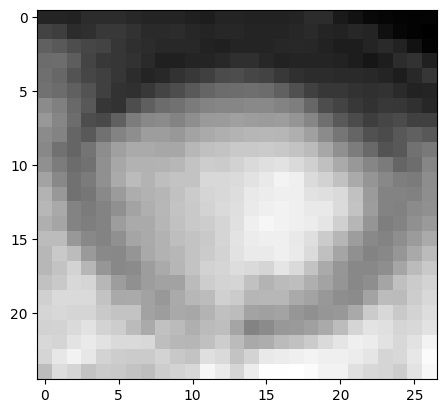

(33, 33)


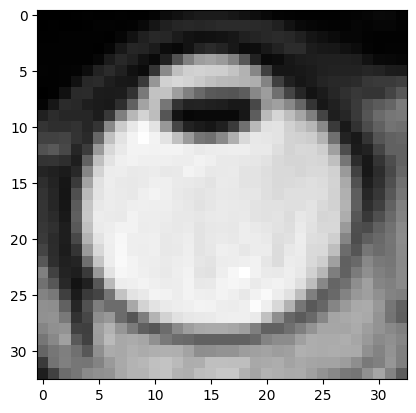

In [ ]:
print(os.listdir(np_dir))
x = np.loadtxt(os.path.join(np_dir, 'test_orbits_001-left.txt')) # retrieve numpy array saved as txt file
print(np.shape(x))
plt.imshow(x, cmap='gray')
plt.show()
y = np.loadtxt(os.path.join(np_dir, 'test_orbits_000-right.txt')) # retrieve numpy array saved as txt file
print(np.shape(y))
plt.imshow(y, cmap='gray')
plt.show()